<img src="Archivos/miad4.png" width=900x>

 # TAREA 1

**Departamento de Ingeniería Industrial.**

**Maestría en Inteligencia Analítica para la Toma de Decisiones (Analytics).**

**Modelos de Análisis Estadístico (MIIA 4100) - 202320.**

Por ningún motivo se recibirán entregas posteriores a la hora límite. En caso de no realizar la entrega la nota asignada será 0.

Notas: La entrega del taller deberá hacerse en un informe autocontenido incluyendo las **gráficas,interpretación y conclusiones**. Adicionalmente debe entregarse el código utilizado en un archivo ipynb, de considerar necesario comentar todas las partes del codigo que crean necesarias para el entendimiento del codigo.

Para todos los literales que lo requieran, se recomienda utilizar una significancia del 5% (confianza del 95%). En caso de utilizar otro nivel de significancia, hacerlo explícito en el informe.

______________________________________________________________________



**Grupo 3**

Integrantes:

Dimey Manrique, Juan Guillermo

Dueñas Criado, Danuil Elias

Medina Lara, Jose David

Ruce Parrado, Angelica Maria

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

## Ejercicio 1
(40%) La base de datos contenida en resultadosicfes.csv tiene información de los
resultados obtenidos en 2019, estos resultados muestran todos los departamentos de
Colombia, por favor tomar como muestra los resultados de los siguientes 5 departamentos; La
Guajira, Valle, Atlántico, Bogotá (la cual en las estadísticas se tiene como departamento) y
Huila. El objetivo es realizar un análisis exploratorio de los datos.


In [2]:
# Implementa tu respuesta en esta celda

# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("pastel")  # establece la paleta de colores a tonos pastel
sns.set_context("talk")    # aumenta el tamaño del texto, útil para presentaciones

#Función para gráficos
def format_plot(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    sns.despine()

In [3]:
df_resultados_icfes = pd.read_csv("Archivos/resultadosicfes.csv", sep=';', encoding= 'UTF-8')

In [4]:
# df_resultados_icfes = pd.read_csv("/content/drive/MyDrive/Tarea_Estadistica_1/Archivos/resultadosicfes.csv", sep=';', encoding= 'UTF-8')
#df_resultados_icfes = pd.read_csv("/content/drive/MyDrive/resultadosicfes.csv", sep=';', encoding= 'UTF-8')

In [5]:
print("# filas: ", df_resultados_icfes.shape[0])
print("# columas: ", df_resultados_icfes.shape[1])

# filas:  546212
# columas:  13


# Análisis exploratorio inicial de la base de datos:

In [6]:
# Se reemplaza el texto con diferente formato
df_resultados_icfes['ESTU_DEPTO_RESIDE'] = df_resultados_icfes['ESTU_DEPTO_RESIDE'].replace({'BOGOTÃ':'BOGOTÁ',
                                                                                             'NARIÃ‘O':'NARIÑO'})
df_resultados_icfes['COLE_JORNADA'] = df_resultados_icfes['COLE_JORNADA'].replace({'MAÃ‘ANA':'MAÑANA'})

In [7]:
df_resultados_icfes.head()

,ESTU_GENERO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,M,MAGDALENA,Estrato 3,OFICIAL,URBANO,MAÑANA,47,48,37,30,54.0,208,25.0
1,M,BOGOTÁ,Estrato 3,NO OFICIAL,URBANO,COMPLETA,60,65,54,59,63.0,299,83.0
2,M,BOLIVAR,Estrato 1,OFICIAL,URBANO,MAÑANA,66,57,41,74,64.0,299,84.0
3,M,BOGOTÁ,Estrato 3,OFICIAL,URBANO,MAÑANA,62,54,61,73,53.0,309,88.0
4,M,BOGOTÁ,Estrato 3,OFICIAL,URBANO,MAÑANA,63,57,55,57,52.0,288,78.0


A continuación, se obtiene el conteo de la población de estudiantes que presentaron el exámen icfes por cada una de las 35 categorías de la columna **ESTU_DEPTO_RESIDE**, distribuidas en 32 departamentos, 1 capital, 1 extranjero y valores nulos:

In [8]:
pd.DataFrame(df_resultados_icfes.ESTU_DEPTO_RESIDE.value_counts())

,ESTU_DEPTO_RESIDE
BOGOTÁ,83600
ANTIOQUIA,74228
VALLE,38640
CUNDINAMARCA,36196
ATLANTICO,32179
SANTANDER,25473
BOLIVAR,25232
CORDOBA,20037
NARIÑO,16903
BOYACA,16763


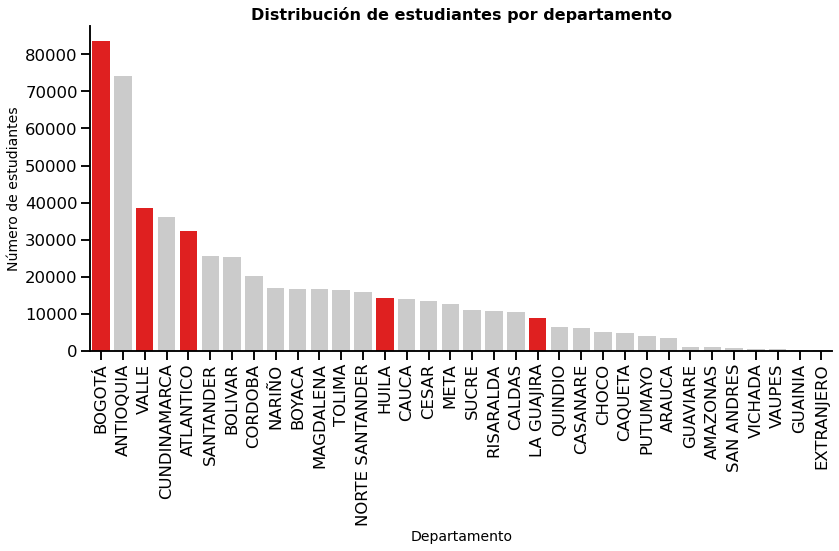

In [9]:
departamentos_muestra = ['LA GUAJIRA','VALLE','ATLANTICO','BOGOTÁ','HUILA']
depto_counts = df_resultados_icfes.ESTU_DEPTO_RESIDE.value_counts()

rojo_pastel = sns.light_palette("red", n_colors=2)[1] 
gris_pastel = sns.light_palette("gray", n_colors=4)[1]
colores = [ rojo_pastel if depto in departamentos_muestra else gris_pastel for depto in depto_counts.index ]

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=depto_counts.index, y=depto_counts.values, ax=ax, palette=colores)

format_plot(ax, "Distribución de estudiantes por departamento", "Departamento", "Número de estudiantes")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Asegurar que todo encaje correctamente
plt.show()

In [10]:
proporcion_muestra = df_resultados_icfes[df_resultados_icfes['ESTU_DEPTO_RESIDE'].isin(departamentos_muestra)].shape[0]/df_resultados_icfes.shape[0]
print('Proporción de la muestra sobre base total: {0:.2%}'.format(proporcion_muestra))

Proporción de la muestra sobre base total: 32.47%


A continuación, se obtiene el conteo de estudiantes que presentaron la prueba icfes por cada una de las categorias de la columna **COLE_NATURALEZA**, que corresponden a **OFICIAL** y **NO OFICIAL**:

In [11]:
pd.DataFrame(df_resultados_icfes.COLE_NATURALEZA.value_counts())

,COLE_NATURALEZA
OFICIAL,416011
NO OFICIAL,130201


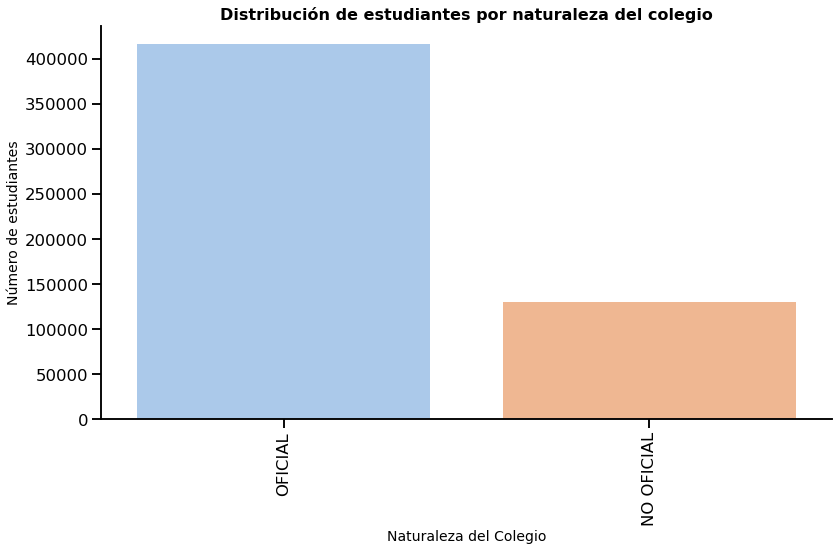

In [12]:
naturaleza_counts = df_resultados_icfes.COLE_NATURALEZA.value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=naturaleza_counts.index, y=naturaleza_counts.values, ax=ax)

format_plot(ax, "Distribución de estudiantes por naturaleza del colegio", "Naturaleza del Colegio", "Número de estudiantes")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Asegurar que todo encaje correctamente
plt.show()

A continuación, se obtiene el conteo de estudiantes que presentaron la prueba icfes por cada una de las categorias de la columna **COLE_AREA_UBICACION**, que corresponden a **URBANO** y **RURAL**:

In [13]:
pd.DataFrame(df_resultados_icfes.COLE_AREA_UBICACION.value_counts())

,COLE_AREA_UBICACION
URBANO,460467
RURAL,85745


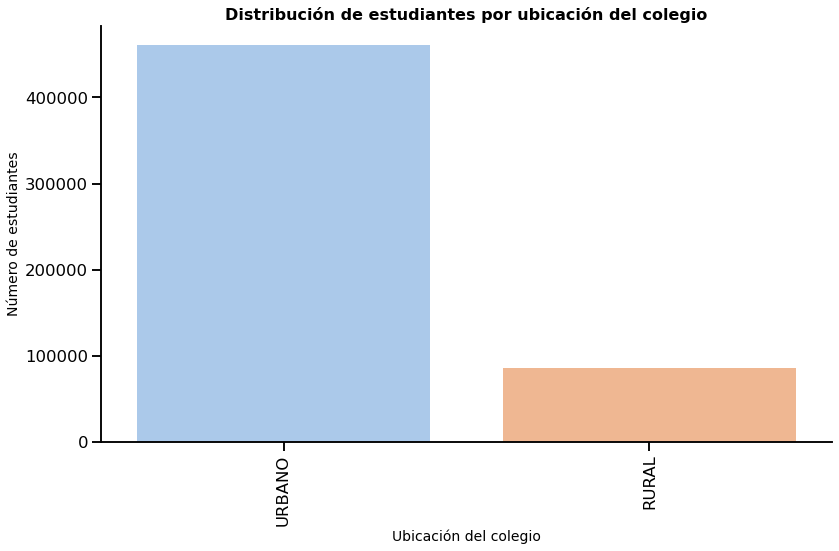

In [14]:
area_counts = df_resultados_icfes.COLE_AREA_UBICACION.value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=area_counts.index, y=area_counts.values, ax=ax)

format_plot(ax, "Distribución de estudiantes por ubicación del colegio", "Ubicación del colegio", "Número de estudiantes")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Asegurar que todo encaje correctamente
plt.show()

A continuación, se obtiene el conteo de estudiantes que presentaron la prueba icfes por cada una de las 6 categorias de la columna **COLE_JORNADA**, que corresponden a **MAÑANA**, **COMPLETA**, **UNICA**, **TARDE**, **SABATINA** y **NOCHE**:

In [15]:
pd.DataFrame(df_resultados_icfes.COLE_JORNADA.value_counts())

,COLE_JORNADA
MAÑANA,257060
COMPLETA,89520
UNICA,67361
TARDE,59049
SABATINA,39098
NOCHE,34124


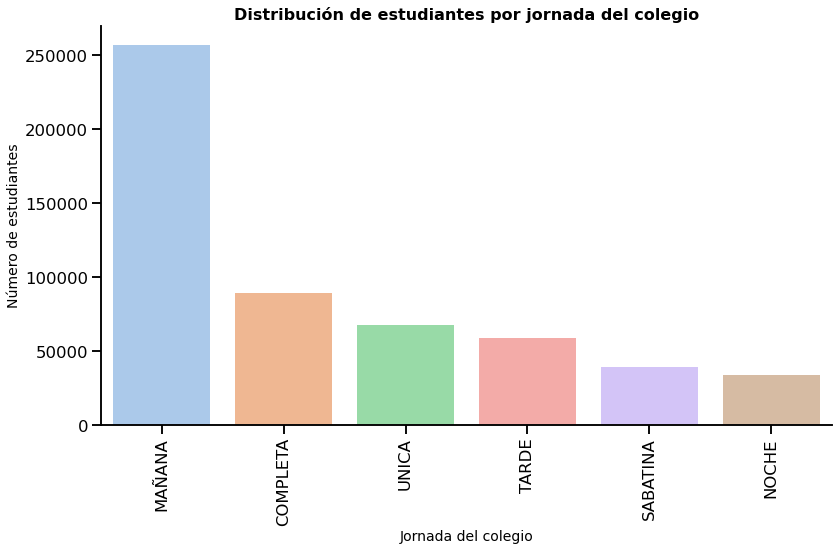

In [16]:
jornada_counts = df_resultados_icfes.COLE_JORNADA.value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=jornada_counts.index, y=jornada_counts.values, ax=ax)

format_plot(ax, "Distribución de estudiantes por jornada del colegio", "Jornada del colegio", "Número de estudiantes")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Asegurar que todo encaje correctamente
plt.show()

A continuación, se obtiene el conteo de estudiantes que presentaron la prueba icfes, distribuidos en por cada una de las categorias  **FAMI_ESTRATOVIVIENDA_GP**, incluyendo *Sin Estrato*:

In [17]:
pd.DataFrame(df_resultados_icfes.FAMI_ESTRATOVIVIENDA.value_counts().sort_index())

,FAMI_ESTRATOVIVIENDA
-,34481
Estrato 1,159977
Estrato 2,188314
Estrato 3,108692
Estrato 4,25810
Estrato 5,8024
Estrato 6,3711
Sin Estrato,17177


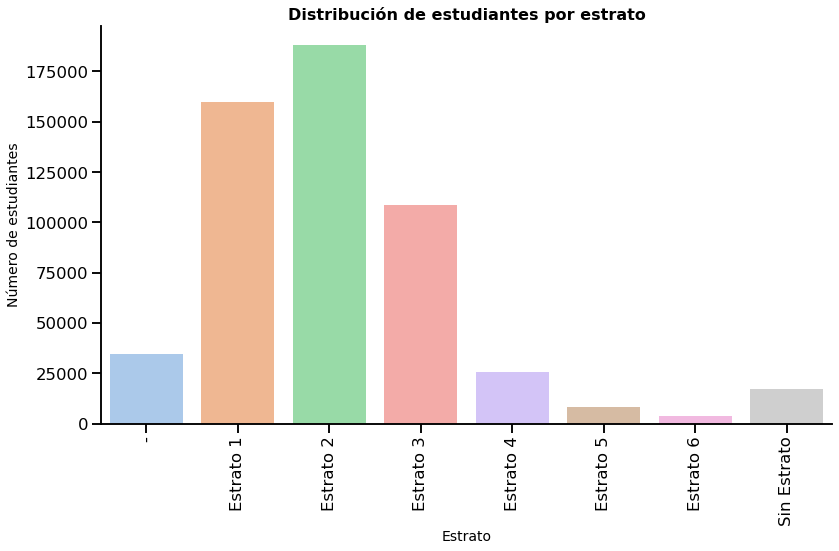

In [18]:
estrato_counts = df_resultados_icfes.FAMI_ESTRATOVIVIENDA.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=estrato_counts.index, y=estrato_counts.values, ax=ax)

format_plot(ax, "Distribución de estudiantes por estrato", "Estrato", "Número de estudiantes")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Asegurar que todo encaje correctamente
plt.show()

In [19]:
df_resultados_icfes['FAMI_ESTRATOVIVIENDA_GP'] = df_resultados_icfes['FAMI_ESTRATOVIVIENDA'].apply(lambda x: '1 - 2' if x in ['Estrato 1','Estrato 2'] else '3 - 4' if x in ['Estrato 3','Estrato 4'] else '5 - 6' if x in ['Estrato 5','Estrato 6'] else np.nan)

A continuación, se obtiene el conteo de estudiantes que presentaron la prueba icfes, distribuidos en 3 grupos de la categoría **FAMI_ESTRATOVIVIENDA_GP**, excluyendo la categoría *Sin Estrato*:
1.   Estratos 1 y 2.
2.   Estratos 3 y 4.
3.   Estratos 5 y 6.

In [20]:
pd.DataFrame(df_resultados_icfes.FAMI_ESTRATOVIVIENDA_GP.value_counts())

,FAMI_ESTRATOVIVIENDA_GP
1 - 2,348291
3 - 4,134502
5 - 6,11735


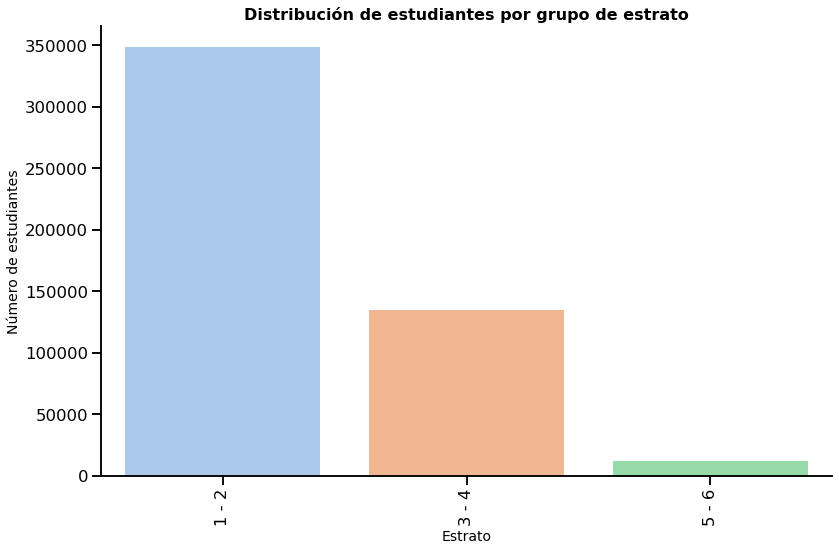

In [21]:
estrato_gp_counts = df_resultados_icfes.FAMI_ESTRATOVIVIENDA_GP.value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=estrato_gp_counts.index, y=estrato_gp_counts.values, ax=ax)

format_plot(ax, "Distribución de estudiantes por grupo de estrato", "Estrato", "Número de estudiantes")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Asegurar que todo encaje correctamente
plt.show()

A continuación, se observa por estrato social, los promedios de las siguientes variables cuantitativas, incluyendo la categoria *Sin Estrato*:

*   5 módulos de la prueba icfes.
*   Puntaje global.
*   Ubicación del percentil.

In [22]:
df_resultados_icfes.groupby('FAMI_ESTRATOVIVIENDA').mean()

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
FAMI_ESTRATOVIVIENDA,,,,,,,
-,48.146776,45.142136,42.358429,41.843769,42.942129,221.313013,36.186784
Estrato 1,50.261363,48.657157,46.551736,44.135845,44.789062,236.001669,44.393184
Estrato 2,52.907309,51.469498,48.982657,46.865050,48.891601,249.833209,52.358658
Estrato 3,55.014362,53.708047,51.136744,49.408107,53.256535,261.945240,58.785244
Estrato 4,56.106277,55.174390,52.618287,51.026656,57.085936,269.947307,61.594769
Estrato 5,54.925224,54.112787,51.451147,50.107428,56.537637,264.737662,58.209995
Estrato 6,51.848289,50.546753,48.155484,47.088386,52.967125,248.422797,49.322824
Sin Estrato,44.405309,42.154916,41.076731,38.090062,39.557354,206.434651,27.200186


- Se realiza el filtro de la información, seleccionando los departamentos indicados: `LA GUAJIRA`, `VALLE`, `ATLANTICO`, `BOGOTÁ`, `HUILA`, y se almacena la información resultante en un dataframe nuevo (*df_muestra_icfes*)

In [23]:
df_muestra_icfes = df_resultados_icfes[df_resultados_icfes['ESTU_DEPTO_RESIDE'].isin(departamentos_muestra)].copy()

El dataframe resultante para los departamentos seleccionados muestra las siguientes dimensiones:

In [24]:
df_muestra_icfes.shape

(177347, 14)

a. (20%) Identifique las variables continuas y para CADA UNA de éstas:
- Determine cuántos valores perdidos tiene cada una.
- Calcule la media, desviación estándar, máximo y mínimo.
- Identifique los departamentos donde los estudiantes obtuvieron un puntaje en matemáticas mayor a 55, un puntaje en lectura mayor a 60 y un puntaje en ingles mayor a 70 reemplace estos valores por valores perdidos. En lo que sigue trabaje con estas variables corregidas.<br>
- Calcule nuevamente la media, desviación estándar, máximo, mínimo. Compare los resultados con los hallados los 2 literales anteriores y comente.

**1. Identificación de Variables Continuas**

Inicialmente obtenemos la información general de cada columna contenida en el dataframe de análisis:

In [25]:
# Identificación de variables continuas

df_muestra_icfes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177347 entries, 1 to 546211
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ESTU_GENERO               177347 non-null  object 
 1   ESTU_DEPTO_RESIDE         177347 non-null  object 
 2   FAMI_ESTRATOVIVIENDA      177347 non-null  object 
 3   COLE_NATURALEZA           177347 non-null  object 
 4   COLE_AREA_UBICACION       177347 non-null  object 
 5   COLE_JORNADA              177347 non-null  object 
 6   PUNT_LECTURA_CRITICA      177347 non-null  int64  
 7   PUNT_MATEMATICAS          177347 non-null  int64  
 8   PUNT_C_NATURALES          177347 non-null  int64  
 9   PUNT_SOCIALES_CIUDADANAS  177347 non-null  int64  
 10  PUNT_INGLES               177346 non-null  float64
 11  PUNT_GLOBAL               177347 non-null  int64  
 12  PERCENTIL_GLOBAL          177346 non-null  float64
 13  FAMI_ESTRATOVIVIENDA_GP   162523 non-null  o

A continuación, se genera un diccionario para almacena las variables continuas como llaves, y el tipo de dato como valor, para su manejo posterior.

In [26]:
variables_continuas = {col:df_muestra_icfes[col].dtype for col in df_muestra_icfes.columns if str(df_muestra_icfes[col].dtype).startswith('float') or str(df_muestra_icfes[col].dtype).startswith('int')}
variables_continuas

{'PUNT_LECTURA_CRITICA': dtype('int64'),
 'PUNT_MATEMATICAS': dtype('int64'),
 'PUNT_C_NATURALES': dtype('int64'),
 'PUNT_SOCIALES_CIUDADANAS': dtype('int64'),
 'PUNT_INGLES': dtype('float64'),
 'PUNT_GLOBAL': dtype('int64'),
 'PERCENTIL_GLOBAL': dtype('float64')}

- **Determinación de Valores Perdidos:**

In [27]:
# Determinación de valores perdidos
nan_count = df_muestra_icfes[variables_continuas.keys()].isna().sum()
nan_count.to_frame(name='Valores Perdidos')

,Valores Perdidos
PUNT_LECTURA_CRITICA,0
PUNT_MATEMATICAS,0
PUNT_C_NATURALES,0
PUNT_SOCIALES_CIUDADANAS,0
PUNT_INGLES,1
PUNT_GLOBAL,0
PERCENTIL_GLOBAL,1


Se determina que los valores nulos que hay en el dataframe después de aplicar el filtro de los 5 departamentos es 1 que está en la columna de **PUNT_INGLES** y 1 en la columna **PERCENTIL_GLOBAL**.

- **Cálculo de media, desviación estándar, máximo y mínimo:**

Para la obtención de las estadísticas descriptivas, empleamos el método **.describe()** y el resumen obtenido se presenta a continuación:

In [28]:
descripcion_inicial = df_muestra_icfes[variables_continuas.keys()].describe()
descripcion_inicial

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
count,177347.000000,177347.000000,177347.000000,177347.000000,177346.000000,177347.000000,177346.000000
mean,53.380226,51.817262,49.546606,47.635641,50.693926,253.013211,53.874037
std,10.416497,11.876710,10.752327,12.228414,12.870041,51.465233,28.723295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,46.000000,43.000000,42.000000,38.000000,41.000000,214.000000,29.000000
50%,54.000000,52.000000,49.000000,47.000000,50.000000,251.000000,55.000000
75%,61.000000,60.000000,57.000000,57.000000,59.000000,290.000000,79.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,477.000000,100.000000


Revisando los datos descriptivos del Dataframe filtrado, se tiene que:
1. Lectura crítica tiene el mejor puntaje promedio (53.38), seguido por matemáticas (51.82), inglés (50.69), ciencias naturales (49.55) y por último sociales ciudadanas (47.64).
2. La asignatura inglés es la que presenta la mayor desviación estándar (12.87), seguido por sociales ciudadanas (12.23), matemáticas (11.88), ciencias naturales (10.75) y lectura crítica (10.42). Esto quiere decir, por ejemplo, que para la asignatura inglés, una gran parte de los resultados obtenidos están en el rango (37.82 - 63.56).
3. El resultado mínimo y máximo en todos las asignaturas fue de 0 y 100 respectivamente.

- **Identificación de departamento según puntajes, y remplazo de registros por valores perdidos:**

A continuación, se identifican los departamentos donde los estudiantes obtuvieron un puntaje en matemáticas mayor a 55, un puntaje en lectura mayor a 60 y un puntaje en ingles mayor a 70.

In [29]:
indices_filtro = (df_muestra_icfes['PUNT_MATEMATICAS']>55) & (df_muestra_icfes['PUNT_LECTURA_CRITICA']>60) & (df_muestra_icfes['PUNT_INGLES']>70)
departamento_altas_calificaciones = list(df_muestra_icfes[indices_filtro]['ESTU_DEPTO_RESIDE'].unique())
departamento_altas_calificaciones

['VALLE', 'ATLANTICO', 'BOGOTÁ', 'HUILA', 'LA GUAJIRA']

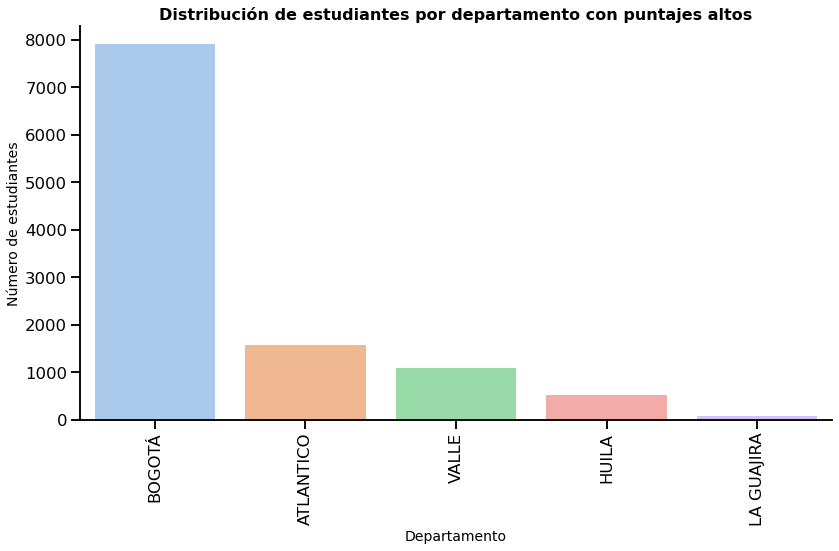

In [30]:
departamentos_alto_counts = df_muestra_icfes[indices_filtro].ESTU_DEPTO_RESIDE.value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=departamentos_alto_counts.index, y=departamentos_alto_counts.values, ax=ax)

format_plot(ax, "Distribución de estudiantes por departamento con puntajes altos", "Departamento", "Número de estudiantes")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Asegurar que todo encaje correctamente
plt.show()

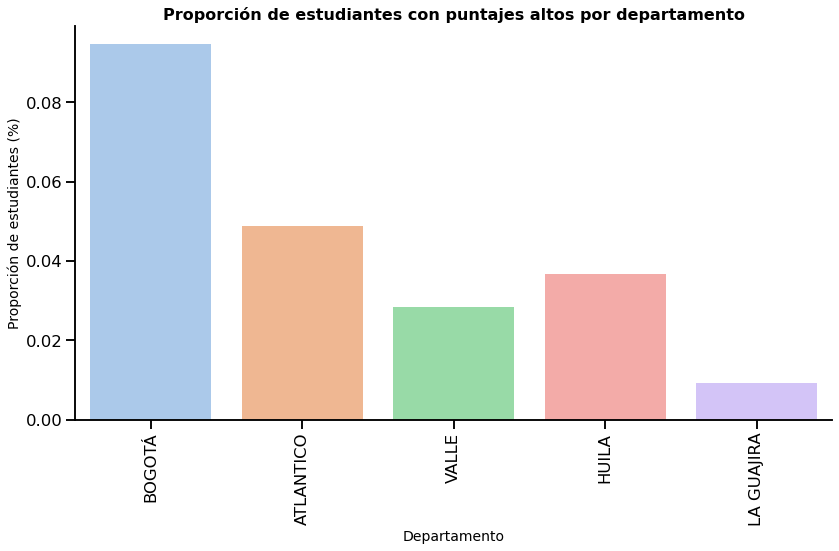

In [31]:
departamentos_alto_counts = df_muestra_icfes[indices_filtro].ESTU_DEPTO_RESIDE.value_counts()[departamentos_alto_counts.index]/df_resultados_icfes.ESTU_DEPTO_RESIDE.value_counts()[departamentos_alto_counts.index]

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=departamentos_alto_counts.index, y=departamentos_alto_counts.values, ax=ax)

format_plot(ax, "Proporción de estudiantes con puntajes altos por departamento", "Departamento", "Proporción de estudiantes (%)")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Asegurar que todo encaje correctamente
plt.show()

In [32]:
pd.DataFrame(departamentos_alto_counts)

,ESTU_DEPTO_RESIDE
BOGOTÁ,0.094533
ATLANTICO,0.048727
VALLE,0.028261
HUILA,0.036698
LA GUAJIRA,0.009163


Del total de estudiantes con puntajes altos, Bogotá lidera los resultados manteniendo la mayor cantidad de estudiantes, seguido de Atlantico, Valle, Huila y finalmente La Guajira, quien tiene la menor cantidad de estudiantes con puntajes altos. Si lo analizamos por distribución relativa por departamento, ningún departamento sobrepasa el 10% de estudiantes con puntajes altos, sin embargo, nuevamente Bogotá lidera con un 9.4%, seguido de Atlantico, Huila, Valle y nuevamente La Guajira muestra el desempeño más bajo, con tan solo un 0.9% de estudiantes con puntajes altos.

Ahora, se excluyen estos estudiantes del análisis de nuestro Dataframe:

In [33]:
# Reemplazar todos los registros de los estudiantes con altas calificaciones por valores perdidos

# Guardamos el dataframe original para consultas posteriores
df_muestra_icfes_original = df_muestra_icfes.copy()

# Se remplazan los registros por valores perdidos
df_muestra_icfes.loc[indices_filtro] = np.nan
df_muestra_icfes

,ESTU_GENERO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,FAMI_ESTRATOVIVIENDA_GP
1,M,BOGOTÁ,Estrato 3,NO OFICIAL,URBANO,COMPLETA,60.0,65.0,54.0,59.0,63.0,299.0,83.0,3 - 4
3,M,BOGOTÁ,Estrato 3,OFICIAL,URBANO,MAÑANA,62.0,54.0,61.0,73.0,53.0,309.0,88.0,3 - 4
4,M,BOGOTÁ,Estrato 3,OFICIAL,URBANO,MAÑANA,63.0,57.0,55.0,57.0,52.0,288.0,78.0,3 - 4
5,M,ATLANTICO,-,NO OFICIAL,URBANO,NOCHE,49.0,29.0,41.0,41.0,35.0,198.0,19.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546193,M,BOGOTÁ,Estrato 3,OFICIAL,URBANO,TARDE,70.0,66.0,60.0,63.0,61.0,322.0,92.0,3 - 4
546195,F,BOGOTÁ,Estrato 2,OFICIAL,URBANO,TARDE,62.0,53.0,54.0,56.0,49.0,278.0,73.0,1 - 2
546202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- **Cálculo de la media, desviación estándar, máximo, mínimo para dataframe corregido:**

Nuevamente empleamos el método **.describe()** para la obtención de las estadísticas descriptivas del dataframe modificado, los resultados se presentan a continuación:

In [34]:
descripcion_final = df_muestra_icfes[variables_continuas.keys()].describe()
descripcion_final

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
count,166186.000000,166186.000000,166186.000000,166186.000000,166185.000000,166186.000000,166185.000000
mean,52.314750,50.604052,48.383691,46.331851,48.916545,246.854494,51.066829
std,9.794356,11.119918,9.939239,11.359774,11.125430,46.735324,27.456461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,46.000000,43.000000,41.000000,37.000000,41.000000,212.000000,28.000000
50%,53.000000,51.000000,48.000000,46.000000,49.000000,247.000000,52.000000
75%,59.000000,59.000000,56.000000,55.000000,57.000000,282.000000,75.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,442.000000,100.000000


A continuación, se consolidan los resultado para las estadísticas de cada variable analizada **PUNT_MATEMATICAS, PUNT_LECTURA_CRITICA, PUNT_INGLES**:

In [35]:
# df_muestra_icfes['PUNT_MATEMATICAS'] = df_muestra_icfes['PUNT_MATEMATICAS'].apply(lambda x: np.nan if x >55 else x)
# df_muestra_icfes['PUNT_LECTURA_CRITICA'] = df_muestra_icfes['PUNT_LECTURA_CRITICA'].apply(lambda x: np.nan if x >60 else x)
# df_muestra_icfes['PUNT_INGLES'] = df_muestra_icfes['PUNT_INGLES'].apply(lambda x: np.nan if x >70 else x)

In [36]:
## Comparación de estadísticas por variable
for col in descripcion_final.columns:
    display(descripcion_inicial[[col]].join(descripcion_final[[col]],
                                            lsuffix='_inicial', rsuffix='_correg'))

,PUNT_LECTURA_CRITICA_inicial,PUNT_LECTURA_CRITICA_correg
count,177347.000000,166186.000000
mean,53.380226,52.314750
std,10.416497,9.794356
min,0.000000,0.000000
25%,46.000000,46.000000
50%,54.000000,53.000000
75%,61.000000,59.000000
max,100.000000,100.000000


,PUNT_MATEMATICAS_inicial,PUNT_MATEMATICAS_correg
count,177347.000000,166186.000000
mean,51.817262,50.604052
std,11.876710,11.119918
min,0.000000,0.000000
25%,43.000000,43.000000
50%,52.000000,51.000000
75%,60.000000,59.000000
max,100.000000,100.000000


,PUNT_C_NATURALES_inicial,PUNT_C_NATURALES_correg
count,177347.000000,166186.000000
mean,49.546606,48.383691
std,10.752327,9.939239
min,0.000000,0.000000
25%,42.000000,41.000000
50%,49.000000,48.000000
75%,57.000000,56.000000
max,100.000000,100.000000


,PUNT_SOCIALES_CIUDADANAS_inicial,PUNT_SOCIALES_CIUDADANAS_correg
count,177347.000000,166186.000000
mean,47.635641,46.331851
std,12.228414,11.359774
min,0.000000,0.000000
25%,38.000000,37.000000
50%,47.000000,46.000000
75%,57.000000,55.000000
max,100.000000,100.000000


,PUNT_INGLES_inicial,PUNT_INGLES_correg
count,177346.000000,166185.000000
mean,50.693926,48.916545
std,12.870041,11.125430
min,0.000000,0.000000
25%,41.000000,41.000000
50%,50.000000,49.000000
75%,59.000000,57.000000
max,100.000000,100.000000


,PUNT_GLOBAL_inicial,PUNT_GLOBAL_correg
count,177347.000000,166186.000000
mean,253.013211,246.854494
std,51.465233,46.735324
min,0.000000,0.000000
25%,214.000000,212.000000
50%,251.000000,247.000000
75%,290.000000,282.000000
max,477.000000,442.000000


,PERCENTIL_GLOBAL_inicial,PERCENTIL_GLOBAL_correg
count,177346.000000,166185.000000
mean,53.874037,51.066829
std,28.723295,27.456461
min,1.000000,1.000000
25%,29.000000,28.000000
50%,55.000000,52.000000
75%,79.000000,75.000000
max,100.000000,100.000000


Al comparar los datos descriptivos generados, se pasó de tener 177.347 resultados de pruebas icfes a 166.186 resultados. Estoy quiere decir que 11.161 estudiantes obtuvieron puntajes mayores a 55, 60 y 70 en matemáticas, lectura crítica e inglés respectivamente.

**Lectura crítica:** Al comparar los datos descriptivos de la asignatura lectura crítica, se obtiene una media o promedio menor ya que pasó de 53.38 a 52.31 como puntaje promedio. El mismo comportamiento se puede observar con la desviación estandar, pasó de 10.42 a 9.79; Resultados que concuerdan con el filtro aplicado ya que se retiraron los puntajes altos de la muestra.

**Matemáticas:** Al comparar los datos descriptivos de la asignatura matemáticas, se obtiene una media o promedio menor ya que pasó de 51.82 a 50.62 como puntaje promedio. El mismo comportamiento se puede observar con la desviación estandar, pasó de 11.88 a 11.12; Resultados que concuerdan con el filtro aplicado ya que se retiraron los puntajes altos de la muestra.

**Ciencias Naturales:** Al comparar los datos descriptivos de la asignatura matemáticas, se obtiene una media o promedio menor ya que pasó de 49.55 a 48.38 como puntaje promedio. El mismo comportamiento se puede observar con la desviación estandar, pasó de 10.75 a 9.94; Resultados que concuerdan con el filtro aplicado ya que se retiraron los puntajes altos de la muestra.

**Sociales Ciudadanas:** Al comparar los datos descriptivos de la asignatura sociales ciudadanas, se obtiene una media o promedio menor ya que pasó de 47.64 a 46.33 como puntaje promedio. El mismo comportamiento se puede observar con la desviación estandar, pasó de 12.23 a 11.36; Resultados que concuerdan con el filtro aplicado ya que se retiraron los puntajes altos de la muestra.

**Inglés:** Al comparar los datos descriptivos de la asignatura ingles, se obtiene una media o promedio menor ya que pasó de 50.69 a 48.92 como puntaje promedio. El mismo comportamiento se puede observar con la desviación estandar, pasó de 12.87 a 11.13; Resultados que concuerdan con el filtro aplicado ya que se retiraron los puntajes altos de la muestra.

Como conclusión, el puntaje global muestra el cambio tomando en cuenta todas las asignaturas, pasó de 253.01 a 246.85 como puntaje promedio. El mismo comportamiento se puede observar con la desviación estandar, pasó de 51.47 a 46.74; Resultados que concuerdan con el filtro aplicado ya que se retiraron los puntajes altos de la muestra.

In [37]:
for var in variables_continuas.items():
    print(f"Valores Nulos:  {sum(df_muestra_icfes[var[0]].isnull())}  | {var[0]}")

Valores Nulos:  11161  | PUNT_LECTURA_CRITICA
Valores Nulos:  11161  | PUNT_MATEMATICAS
Valores Nulos:  11161  | PUNT_C_NATURALES
Valores Nulos:  11161  | PUNT_SOCIALES_CIUDADANAS
Valores Nulos:  11162  | PUNT_INGLES
Valores Nulos:  11161  | PUNT_GLOBAL
Valores Nulos:  11162  | PERCENTIL_GLOBAL


b. (5%) Compare en una tabla los puntajes de matemáticas, lectura y ciencias naturales, e ilustre gráficamente con gráficas de caja para cada una de las materias. Comente.

In [38]:
# Implementa tu respuesta en esta celda
descripcion_final[['PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_C_NATURALES']]

,PUNT_MATEMATICAS,PUNT_LECTURA_CRITICA,PUNT_C_NATURALES
count,166186.000000,166186.000000,166186.000000
mean,50.604052,52.314750,48.383691
std,11.119918,9.794356,9.939239
min,0.000000,0.000000,0.000000
25%,43.000000,46.000000,41.000000
50%,51.000000,53.000000,48.000000
75%,59.000000,59.000000,56.000000
max,100.000000,100.000000,100.000000


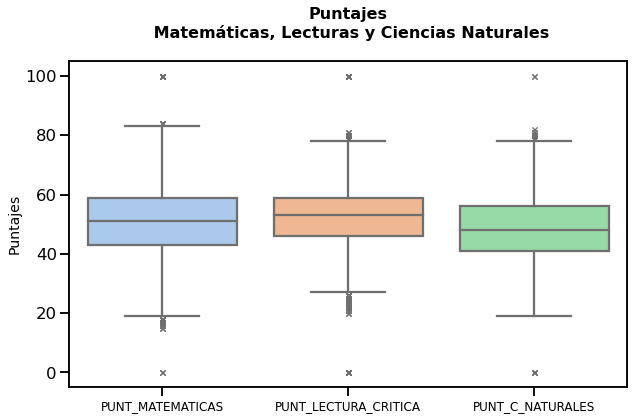

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_muestra_icfes[['PUNT_MATEMATICAS','PUNT_LECTURA_CRITICA','PUNT_C_NATURALES']], flierprops={"marker": "x"})

plt.title("Puntajes\n Matemáticas, Lecturas y Ciencias Naturales\n", fontsize=16, fontweight='bold')
plt.ylabel('Puntajes', size=14)
plt.xticks(size=12)
plt.show()

Se observa para las tres variables un tamaño de caja pequeño, por lo cual se infiere que la mayoría de los datos no están muy dispersos respecto a la mediana o cuartil No.2, por ende la distribución para cada variable pude ser simetrica.

Adicionalmente, a continuación se muestra los diagramas de caja agrupando los puntajes por la naturaleza del colegio y departamento, con el fin de observar posibles correlaciones.

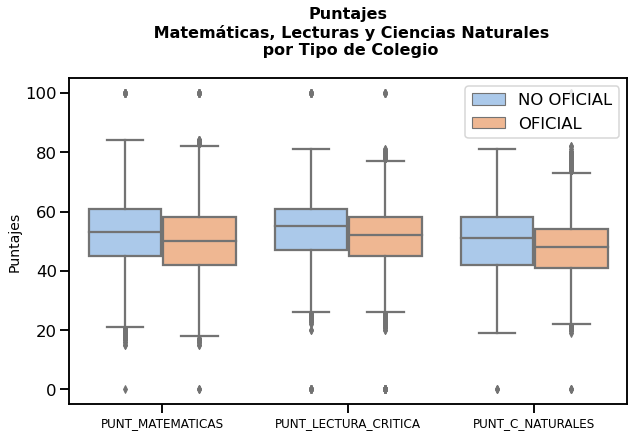

In [40]:
plt.figure(figsize=(10,6))
df_melted = df_muestra_icfes.melt(id_vars='COLE_NATURALEZA', value_vars=['PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_C_NATURALES'])

sns.boxplot(x='variable', y='value', data=df_melted, hue='COLE_NATURALEZA')
plt.title("Puntajes\n Matemáticas, Lecturas y Ciencias Naturales\n por Tipo de Colegio\n", fontsize=16, fontweight='bold')
plt.ylabel('Puntajes', size=14)
plt.xlabel('')
plt.xticks(size=12)
plt.legend(loc=1)
plt.show()


Se observa para las tres variables, que las cajas de la categoria **NO OFICIAL** presentan tamaños superiores a las cajas para la categoria **OFICIAL**, por ejemplo, para las variables **PUNT_LECTURA_CRITICA** y **PUNT_C_NATURALES** la linea de la mediana se acerca más al cuartil No. 3, por ende la distribución de estas dos variables puede ser asimetrica negativa.




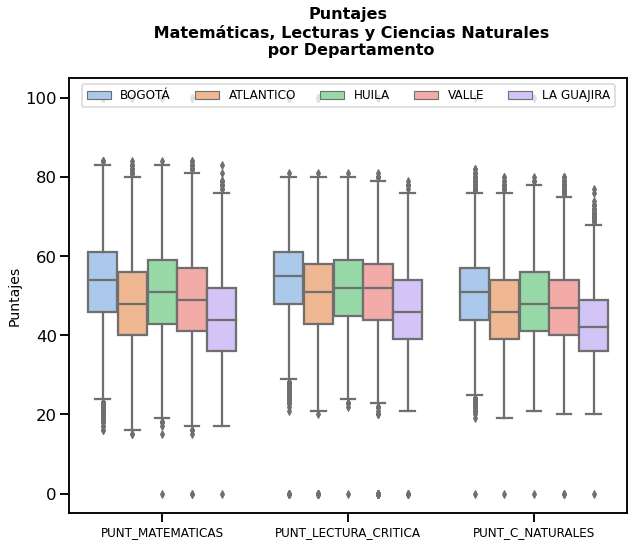

In [41]:
plt.figure(figsize=(10,8))
df_melted = df_muestra_icfes.melt(id_vars='ESTU_DEPTO_RESIDE', value_vars=['PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_C_NATURALES'])
sns.boxplot(x='variable', y='value', data=df_melted, hue='ESTU_DEPTO_RESIDE')
plt.title("Puntajes\n Matemáticas, Lecturas y Ciencias Naturales\n por Departamento\n", fontsize=16, fontweight='bold')
plt.ylabel('Puntajes', size=14)
plt.xlabel('')
plt.xticks(size=12)
plt.legend(ncol = 5, loc=9, fontsize=12,)
plt.show()

Se observa un tamaño proporcional de las cajas para cada puntaje por departamento, con lo que se puede inferir que su distribución es simetrica. También se puede confirmar que para categoria **BOGOTÁ** los tres puntajes son significativamente altos respecto a los otros departamentos y que para el departamento de **LA GUAJIRA** los tres puntajes son significativamente bajos. 
En **BOGOTÁ** y **ALTANTICO** no hubo puntajes de cero en **PUNT_MATEMATICAS**, situación que si ocurrió en los demás departamentos. Es importante denotar que si bien **BOGOTÁ** presenta los puntajes más altos, presenta en los tres modulos una gran cantidad de valores mínimos, situacion que no es tan notoria en los otros departamentos.


c. (5%) Identifique el departamento que tiene los puntajes globales más altos. Identifique el que tiene los mejores puntajes en matemáticas.

A continuación, se agrupa la información por departamento `ESTU_DEPTO_RESIDE`y se calcula el promedio de los puntajes objenido para identificar a que departamento corresponde el puntaje global promedio más alto:

In [42]:
# Implementa tu respuesta en esta celda
df_muestra_icfes.groupby('ESTU_DEPTO_RESIDE').mean().sort_values(by='PUNT_GLOBAL', ascending=False)[['PUNT_GLOBAL']]

,PUNT_GLOBAL
ESTU_DEPTO_RESIDE,
BOGOTÁ,258.256761
HUILA,246.137352
VALLE,239.724672
ATLANTICO,236.283297
LA GUAJIRA,216.933326


A partir de la tabla anterior es posible concluir que el departamento con el mayor puntaje global promedio corresponde a **BOGOTÁ** con un valor de **258.3**.

Repitiendo el procedimiento anterior para el caso del puntaje en matemáticas, obtenemos el siguiente resultado:

In [43]:
df_muestra_icfes.groupby('ESTU_DEPTO_RESIDE').mean().sort_values(by='PUNT_MATEMATICAS', ascending=False)[['PUNT_MATEMATICAS']]

,PUNT_MATEMATICAS
ESTU_DEPTO_RESIDE,
BOGOTÁ,53.141881
HUILA,50.973252
VALLE,48.692287
ATLANTICO,48.268074
LA GUAJIRA,44.458728


Nuevamente se observa que **BOGOTÁ** contiene los estudiantes con el mayor puntaje promedio en el área de Matemáticas.Por otra parte, es interesar observar que el ordenamiento obtenido para el puntaje global (`PUNT_GLOBAL`) promedio es igual al obtenido para el puntaje en matemáticas (`PUNT_MATEMATICAS`) promedio.

Con el fin de detallar más el análisis, a continuación, se presenta el gráfico de caja de la variable puntaje (`PUNT_GLOBAL`) por departamento:

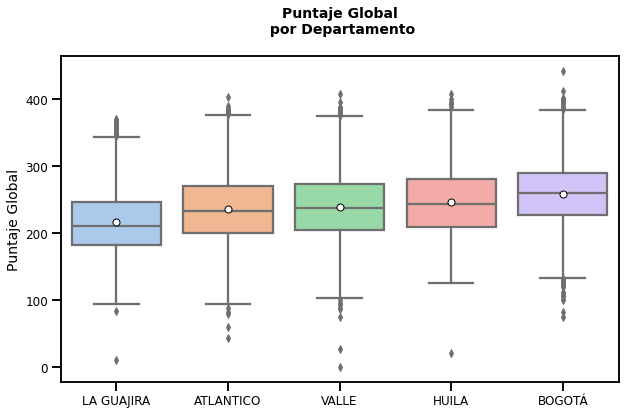

In [44]:
# Gráfico de Caja - Puntaje Global por Departamento
plt.figure(figsize=(10,6))

my_order = df_muestra_icfes.groupby(by=["ESTU_DEPTO_RESIDE"])["PUNT_GLOBAL"].mean().sort_values(ascending=False).iloc[::-1].index
sns.boxplot(x='ESTU_DEPTO_RESIDE', y='PUNT_GLOBAL',
            data=df_muestra_icfes, order = my_order, showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Puntaje Global\n por Departamento\n", fontsize=14, fontweight='bold')
plt.xlabel("")
plt.ylabel("Puntaje Global", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


Con base en la figura anterior podemos observar que, como se mencionó previamente, el mayor puntaje global promedio (representado por el marcador circular de color blanco) corresponde a **BOGOTÁ**. Por otra parte, podemos observar que, a excepción de **LA GUAJIRA**, los departamento de **ATLANTICO**, **VALLE** Y **HUILA** exhiben valores extremos superiores similares a los de **BOGOTA**, sin embargo también exhiben valores extremos inferiores menores a los evidenciados para **BOGOTÁ** por lo que su media se ve afectada, arrojando valores menores.  

Si analizamos la mediana del puntaje global en cada departamento, se observa de igual forma que el departamento con el mayor valor de mediana para el puntaje global es **BOGOTÁ**. Lo cual, en este caso particular, muestra consistencia con el análisis previo a partir de la media. Esto ocurre porque en general, los valores de la mediana y la media del puntaje global son muy cercanas para cada departamento.

A continuación, se presenta repite este análisis para el puntaje en matemáticas **PUNT_MATEMATICAS** por departamento:

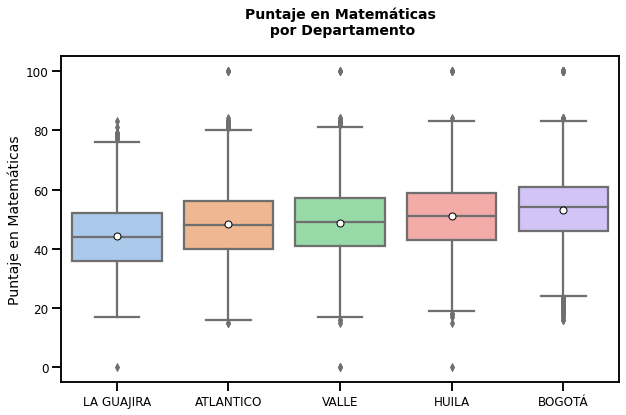

In [45]:
# Gráfico de Caja - Puntaje Global por Departamento
plt.figure(figsize=(10,6))

my_order = df_muestra_icfes.groupby(by=["ESTU_DEPTO_RESIDE"])["PUNT_MATEMATICAS"].mean().sort_values(ascending=False).iloc[::-1].index
sns.boxplot(x='ESTU_DEPTO_RESIDE', y='PUNT_MATEMATICAS',
            data=df_muestra_icfes, order = my_order, showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"7"})
plt.title("Puntaje en Matemáticas\n por Departamento\n", fontsize=14, fontweight='bold')
plt.xlabel("")
plt.ylabel("Puntaje en Matemáticas", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

Con base en la figura, podemos observar que el comportamiento de las estadísticas media y mediana para el puntaje en matemáticas **PUNT_MATEMATICAS** es similar al descrito en el caso anterior. Es posible observar nuevamente que tanto la media como la mediana del puntaje en matemáticas es mayor para el caso de **BOGOTÁ**. Así mismo, podemos observar que la distribución del puntaje en matemáticas para este departamento exhibe una menor dispersión que en los demás casos, y una mayor ocurrencia de valores extremos superiores.

d. (5%) Muestre en una tabla el número de estudiantes que pertenece a colegios oficiales y no oficiales. Ilustre mediante una gráfica. ¿Cree Ud. que los resultados del puntaje global se ven influenciado por el tipo de colegio?

In [46]:
# Implementa tu respuesta en esta celda

df_resultados_icfes['COLE_NATURALEZA'].value_counts().to_frame(name='Número de Estudiantes')

,Número de Estudiantes
OFICIAL,416011
NO OFICIAL,130201


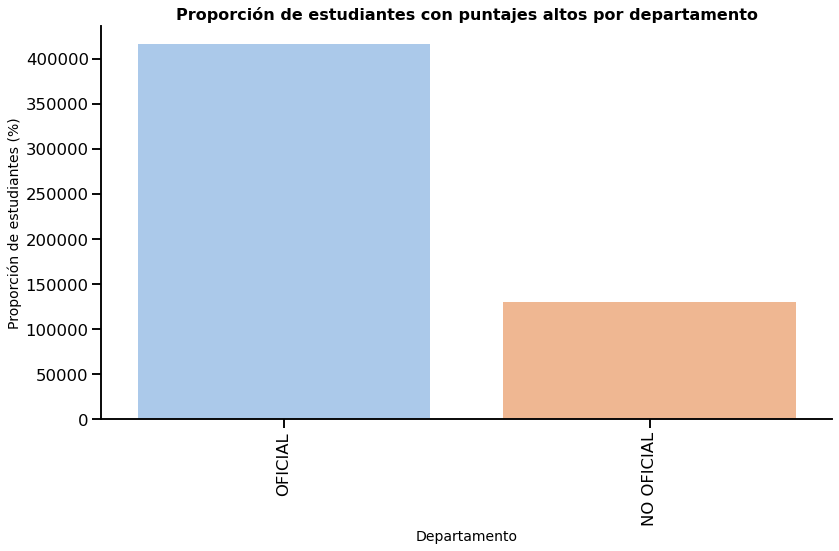

In [47]:
departamentos_alto_counts = df_resultados_icfes.COLE_NATURALEZA.value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=departamentos_alto_counts.index, y=departamentos_alto_counts.values, ax=ax)

format_plot(ax, "Proporción de estudiantes con puntajes altos por departamento", "Departamento", "Proporción de estudiantes (%)")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Asegurar que todo encaje correctamente
plt.show()

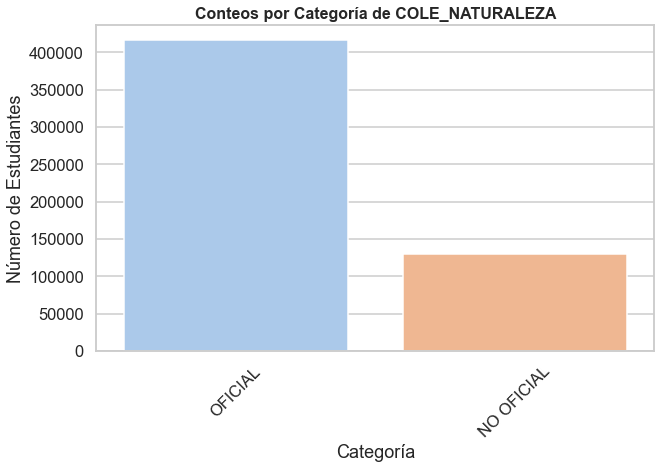

In [48]:
# Implementa tu respuesta en esta celda

import seaborn as sns
import matplotlib.pyplot as plt

# Obtiene los conteos de cada categoría
conteos = df_resultados_icfes.COLE_NATURALEZA.value_counts()

# Configuración del estilo de Seaborn (opcional pero lo hace más bonito)
sns.set_style("whitegrid")

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=conteos.index, y=conteos.values)

# Configura el título y etiquetas (opcional pero añade claridad)
plt.title("Conteos por Categoría de COLE_NATURALEZA", fontsize=16, fontweight='bold')
plt.xlabel("Categoría")
plt.ylabel("Número de Estudiantes")
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor legibilidad

# Muestra el gráfico
plt.show()

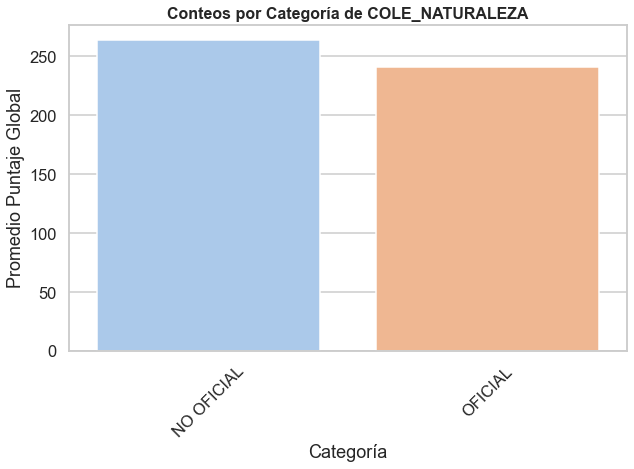

In [49]:
# Implementa tu respuesta en esta celda

import seaborn as sns
import matplotlib.pyplot as plt

# Obtiene los conteos de cada categoría
conteos = df_resultados_icfes.groupby('COLE_NATURALEZA').mean()['PUNT_GLOBAL']

# Configuración del estilo de Seaborn (opcional pero lo hace más bonito)
sns.set_style("whitegrid")

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=conteos.index, y=conteos.values)

# Configura el título y etiquetas (opcional pero añade claridad)
plt.title("Conteos por Categoría de COLE_NATURALEZA", fontsize=16, fontweight='bold')
plt.xlabel("Categoría")
plt.ylabel("Promedio Puntaje Global")
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor legibilidad

# Muestra el gráfico
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

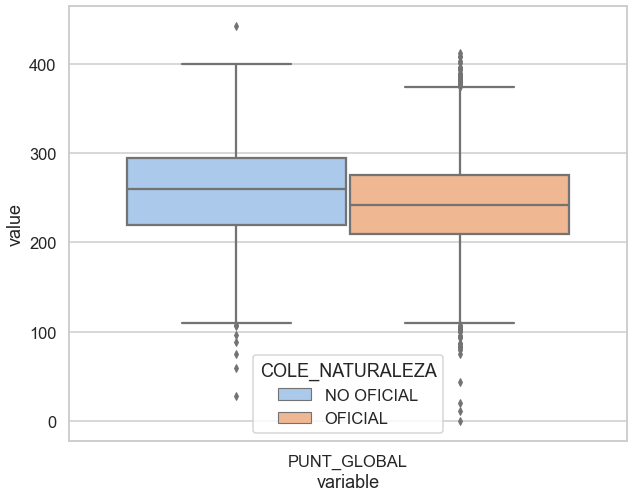

In [50]:
plt.figure(figsize=(10,8))
df_melted = df_muestra_icfes.melt(id_vars='COLE_NATURALEZA', value_vars=['PUNT_GLOBAL'])
sns.boxplot(x='variable', y='value', data=df_melted, hue='COLE_NATURALEZA')

A partir de las anteriores gráficas se puede observar que los colegios **NO OFICIALES** tiene un puntaje global promedio mayor a los colegios **OFICIALES**, por lo que se puede concluir que el puntaje global se ve influenciado por el tipo de colegio.

e. (5%) ¿Cree usted que hay alguna relación entre el puntaje global y el estrato del
estudiante?

Para identificar la posible relación entre el puntaje global (`PUNT_GLOBAL`) y estrato (`FAMI_ESTRATOVIVIENDA`), se realiza a continuación un gráfico de caja, para efectos del análisis no se tienen en cuenta los registros con estrato definido como "Sin Estrato" o "-".

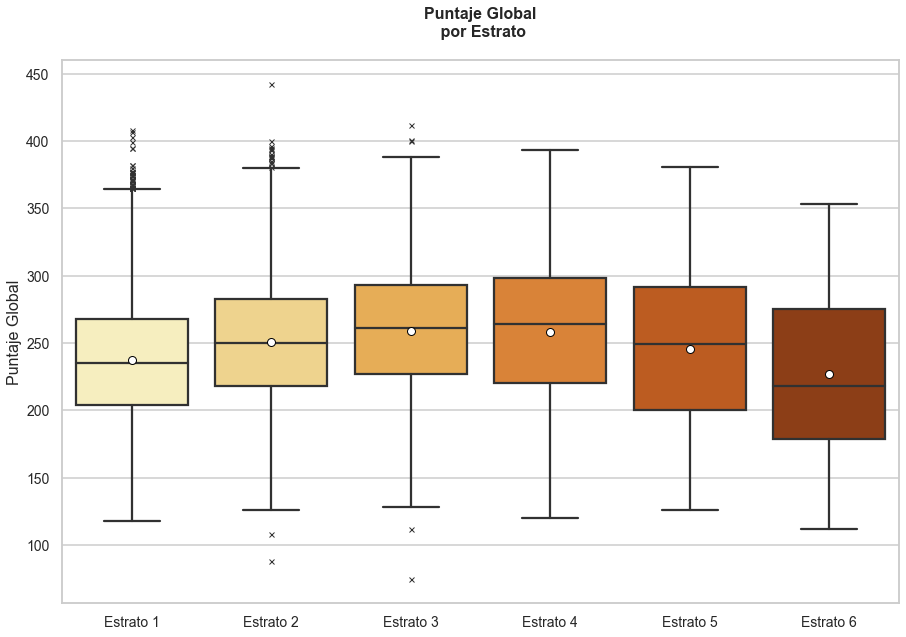

In [51]:
# Implementa tu respuesta en esta celda
plt.figure(figsize=(15, 10))
sns.boxplot(x=df_muestra_icfes['FAMI_ESTRATOVIVIENDA'], y = df_muestra_icfes['PUNT_GLOBAL'],
            flierprops={"marker": "x"}, palette="YlOrBr",
            order=['Estrato 1','Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6'],
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"8"}
           )
plt.title("Puntaje Global\n por Estrato\n", fontsize=16, fontweight='bold')
plt.xlabel("")
plt.ylabel("Puntaje Global", size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

A partir de la figura, se puede observar que al incrementar el estrato desde el 1 al Estrato 3, se observa un incremento tanto de la media como la mediana del puntaje global. A partir del Estrato 3 hasta el Estrato 6 se observa que los estadísticos disminuyen. Exhibiendo que el mejor puntaje global promedio corresponde al Estrato 3. Con base en estas observaciones, es posible concluir que el estrato exhibe una correlación con el puntaje global. Para validar, estas conclusiones iniciales se estiman a continuación los estadísticos básico del puntaje global `PUNT_GLOBAL` para cada estrato:

In [52]:
df_muestra_icfes.groupby(['FAMI_ESTRATOVIVIENDA'])[['PUNT_GLOBAL']].describe().sort_values(by=('PUNT_GLOBAL', 'mean'))

PUNT_GLOBAL                                              \
                           count        mean        std    min    25%    50%   
FAMI_ESTRATOVIVIENDA                                                           
Sin Estrato               3945.0  204.523194  41.242180    0.0  174.0  197.0   
-                        10600.0  222.514528  47.778918   11.0  186.0  218.0   
Estrato 6                  813.0  227.003690  55.772420  112.0  179.0  218.0   
Estrato 1                37954.0  237.257707  44.311033  118.0  204.0  235.0   
Estrato 5                 1834.0  245.851145  55.012226  126.0  200.0  249.0   
Estrato 2                64313.0  250.597764  44.118781   88.0  218.0  250.0   
Estrato 4                 7210.0  258.181831  51.117972  120.0  220.0  264.0   
Estrato 3                39517.0  259.122757  45.141446   75.0  227.0  261.0   

                                     
                         75%    max  
FAMI_ESTRATOVIVIENDA                 
Sin Estrato           228.00  387.0  
-                     257.00  367.0  
Estrato 6             275.00  353.0  
Estrato 1             268.00  408.0  
Estrato 5             291.75  381.0  
Estrato 2             283.00  442.0  
Estrato 4             298.00  393.0  
Estrato 3             293.00  412.0

Con base en los estadísticos presentados, se observa que las clases (estratos) están desbalanceadas, para el **Estrato 2** se cuentan con 64313 registros, mientras que para el **Estrato 6** solo estan disponibles 813. Esta disparidad refleja una composición promedio de la sociedad colombiana, donde los estratos prevalecientes son los estratos entre 1 y 3, con menor ocurrencia de estratos entre 4 y 6. A pesar que este desbalanceo puede afectar nuestras conclusiones iniciales, el número muestras para cada estrato son suficientes para soportar nuestras observaciones.

Un aspecto interesante radica en el hecho que el **Estrato 6** exhiba los menores valores del puntaje global. Esto parecería contraintuitivo dado que se espera que los estudiantes de altos estratos tengan acceso a educación de mayor calidad y por tanto obtuvieran mejores resultados en las pruebas ICFES.

Adicionalmente, en la tabla presentada se observa que tanto la media como la mediana se comportan de igual forma, respecto a nuestras observaciones.

### Tablas de contingencia

In [53]:
tabla_contingencia = pd.crosstab(df_muestra_icfes['FAMI_ESTRATOVIVIENDA_GP'], df_muestra_icfes['COLE_NATURALEZA'])
tabla_contingencia

COLE_NATURALEZA,NO OFICIAL,OFICIAL
FAMI_ESTRATOVIVIENDA_GP,,
1 - 2,23667,78600
3 - 4,22131,24596
5 - 6,1414,1233


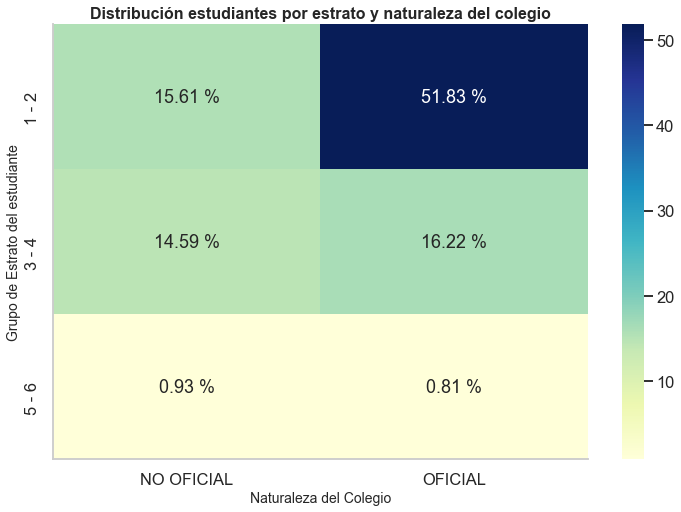

In [54]:
tabla_contingencia = pd.crosstab(df_muestra_icfes['FAMI_ESTRATOVIVIENDA_GP'], df_muestra_icfes['COLE_NATURALEZA'], normalize= "all") * 100

plt.figure(figsize=(12, 8))
ax = sns.heatmap(tabla_contingencia, annot=True, cmap="YlGnBu", fmt='.2f')

# Añadimos el símbolo de % a cada valor en el heatmap
for t in ax.texts:
    t.set_text(t.get_text() + " %")
    
format_plot(ax, "Distribución estudiantes por estrato y naturaleza del colegio", "Naturaleza del Colegio", "Grupo de Estrato del estudiante")
plt.show()

Al ver la distribución de estudiantes por estrato y naturaleza del colegio (Oficial y No Oficial) podemos ver un poco más de la mitad de los estudiantes se ubican en estratos 1 y 2 y pertenecen a colegios Oficiales, en contraste a los estudiantes de estratos altos en colegios oficiales, que no alcanzan a representar ni el 1% de los esudiantes.

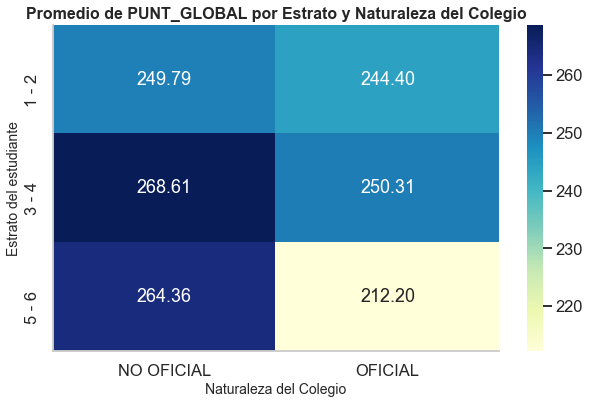

In [55]:
pivot_table = df_muestra_icfes.pivot_table(values='PUNT_GLOBAL', index='FAMI_ESTRATOVIVIENDA_GP', columns='COLE_NATURALEZA', aggfunc='mean')

plt.figure(figsize=(10, 6))
ax = sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='.2f')

format_plot(ax, "Promedio de PUNT_GLOBAL por Estrato y Naturaleza del Colegio", "Naturaleza del Colegio", "Estrato del estudiante")
plt.show()

Si contrastamos la distribución anterior con el puntaje medio obtenido por los estudiantes, podemos ver que los estudiantes de estratos más altos (5 y 6) que estudian en colegios oficiales, son los que muestran los resultados más bajos. Por otro lado, los estudiantes que se encuentran en estratos del 4 al 6 y colegios No oficiales son los que lideran los resultados globales de la prueba con puntaje medio superior a 264.

In [56]:
tabla_contingencia = pd.crosstab(df_muestra_icfes['COLE_NATURALEZA'], df_muestra_icfes['COLE_AREA_UBICACION'])
tabla_contingencia

COLE_AREA_UBICACION,RURAL,URBANO
COLE_NATURALEZA,,
NO OFICIAL,933,49948
OFICIAL,11982,103323


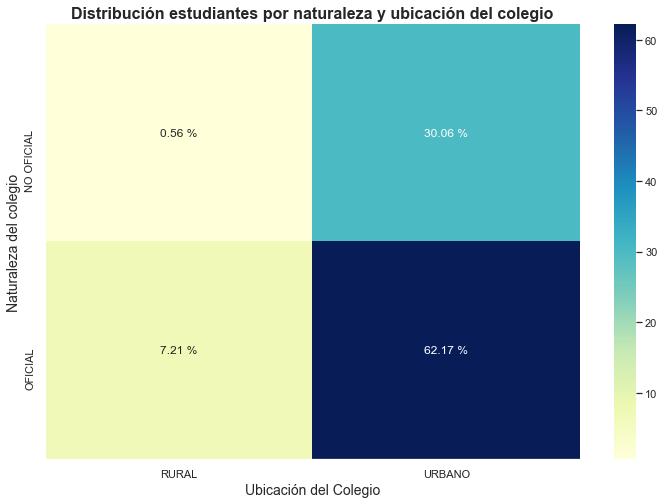

In [81]:
tabla_contingencia = pd.crosstab(df_muestra_icfes['COLE_NATURALEZA'], df_muestra_icfes['COLE_AREA_UBICACION'], normalize= "all") * 100

plt.figure(figsize=(12, 8))
ax = sns.heatmap(tabla_contingencia, annot=True, cmap="YlGnBu", fmt='.2f')

# Añadimos el símbolo de % a cada valor en el heatmap
for t in ax.texts:
    t.set_text(t.get_text() + " %")
    
format_plot(ax, "Distribución estudiantes por naturaleza y ubicación del colegio", "Ubicación del Colegio", "Naturaleza del colegio")
plt.show()

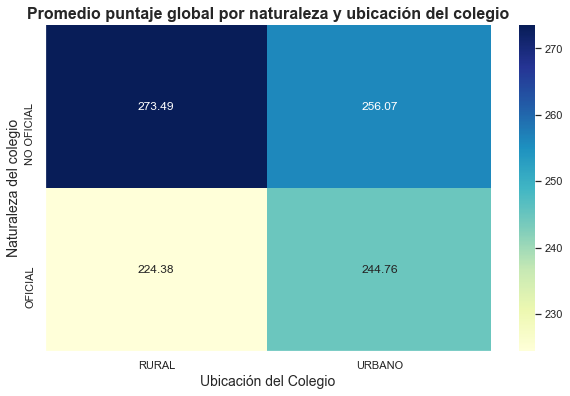

In [84]:
pivot_table = df_muestra_icfes.pivot_table(values='PUNT_GLOBAL', index='COLE_NATURALEZA', columns='COLE_AREA_UBICACION', aggfunc='mean')

plt.figure(figsize=(10, 6))
ax = sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='.2f')

format_plot(ax, "Promedio puntaje global por naturaleza y ubicación del colegio", "Ubicación del Colegio", "Naturaleza del colegio")
plt.show()

Al analizar el puntaje global de los estudiantes por naturaleza y ubicación del colegio podemos observar que los promedios más altos se ubican en los colegios rurales de naturaleza no oficial, debido a que la cantidad de estudiantes que se ubican en esta categoría es la más baja con respecto a las otras categorías.

## Ejercicio 2

(30%) Teniendo en cuenta los resultados obtenidos por los estudiantes en sus pruebas ICFES una academia dedicada a cursos pre-icfes decidió ofertar una variedad de cursos con el fin de lograr que los estudiantes obtengan puntajes mayores a 400 puntos. La academia optó por desarrollar 4 cursos distintos, estos están pensados variando la intensidad de horas de la siguiente manera; intensivo (2 horas díarias), semi-intensivo (4 horas semanales), semanal (5 horas en un solo día) y super intensivo (3 horas diarias).En la base de datos cursos.cvs, encontrara los resultados obtenidos por los estudiantes de acuerdo con el curso tomado. Con base en la información, conteste las siguientes preguntas: <br>

In [59]:
# Implementa tu respuesta en esta celda

df_cursos = pd.read_csv("Archivos/cursos.csv", sep=',', encoding= 'UTF-8')

#df_cursos = pd.read_csv("/content/drive/MyDrive/cursos.csv", sep=',', encoding= 'UTF-8')


In [60]:
df_cursos.shape

(37, 2)

In [61]:
df_cursos.head()

,Tipo de Curso,Puntaje
0,Intensivo,382
1,Intensivo,414
2,Intensivo,412
3,Intensivo,401
4,Intensivo,412


a. (10%) Realice estadísticas descriptivas (promedio, frecuencia, desviación, entre otros) que permitan observar diferencias de los puntajes obtenidos por los estudiantes según el curso tomado y concluya

In [62]:
df_cursos.columns

Index(['Tipo de Curso ', 'Puntaje'], dtype='object')

In [63]:
df_agg = df_cursos.groupby('Tipo de Curso ').agg({'Puntaje': ['count', 'mean', 'std','median']})
df_agg.columns = ['_'.join(col) for col in df_agg.columns]
df_agg = df_agg.loc[['Super-Intensivo','Intensivo','Semi-Intensivo','Semanal'],:]
df_agg

,Puntaje_count,Puntaje_mean,Puntaje_std,Puntaje_median
Tipo de Curso,,,,
Super-Intensivo,13,429.307692,19.905546,424
Intensivo,6,406.166667,12.937027,412
Semi-Intensivo,7,397.142857,11.126973,400
Semanal,11,368.545455,39.327760,380


In [64]:
df_agg.index

Index(['Super-Intensivo', 'Intensivo', 'Semi-Intensivo', 'Semanal'], dtype='object', name='Tipo de Curso ')

<AxesSubplot:xlabel='Tipo de Curso '>

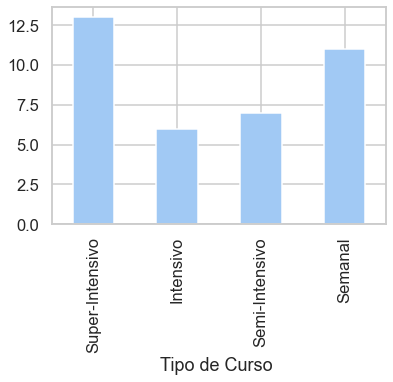

In [65]:
df_agg['Puntaje_count'].plot.bar()

En la primera gráfica se muestra la cantidad de estudiantes que están inscritas por curso, en superintensivo 13 estudiantes, intensivo 6 estudiantes, semi-intensivo 7 estudiantes y semanal 11 estudiantes. Se evidencia que el 35% de los estudiantes se han matriculado al curso **Super Intesivo**.

<AxesSubplot:xlabel='Tipo de Curso '>

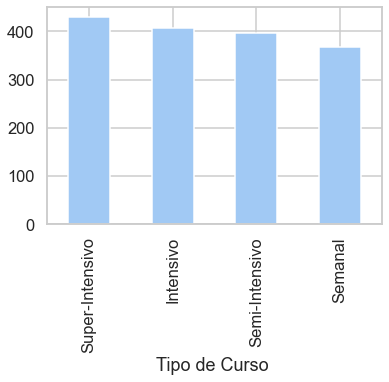

In [66]:
df_agg['Puntaje_mean'].plot.bar()

Ahora bien, el puntaje promedio obtenido en cada curso es de 429.30 para el curso super-intensivo, 406.17 para el intensivo, 397.14 para el semi-intensivo y por último 368.55 para el semanal.

<AxesSubplot:xlabel='Tipo de Curso '>

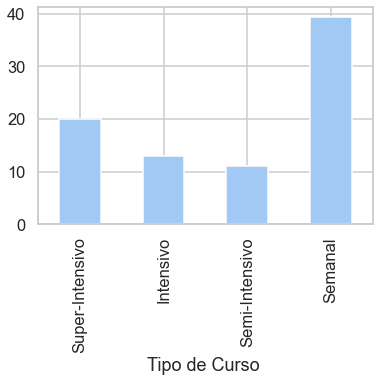

In [67]:
df_agg['Puntaje_std'].plot.bar()

En cuanto a la desviación estandar, se puede asumir a partir de los resultados que los datos mas dispersos se encuentran en el curso semanal ya que su desviación es de 39.33 comparado con los resultados de super-intensivo, intensip y semi-intensivo que fueron 19.91, 12.94 y 11.13 respectivamente. Con lo cual se infiere que los puntajes en el curso **Semanal** son más variables que en el curso **Semi Intensivo**.

<AxesSubplot:xlabel='Tipo de Curso '>

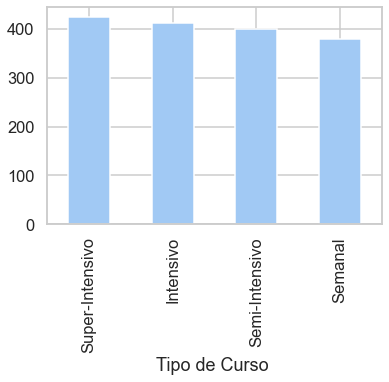

In [68]:
df_agg['Puntaje_median'].plot.bar()

Por último, al revisar el dato descriptivo de la mediana en cada curso, acorde a lo analizado en las gráficas anteriores, el comportamiento va acorde a los resultados promedio obtenido en cada uno de los cursos. Es importante tener en cuenta que los estudiantes en cada curso son diferentes por tal motivo no es lo mismo generar datos descriptivos con un muestra de 13 registro a 6. 

<AxesSubplot:xlabel='Tipo de Curso ', ylabel='Puntaje'>

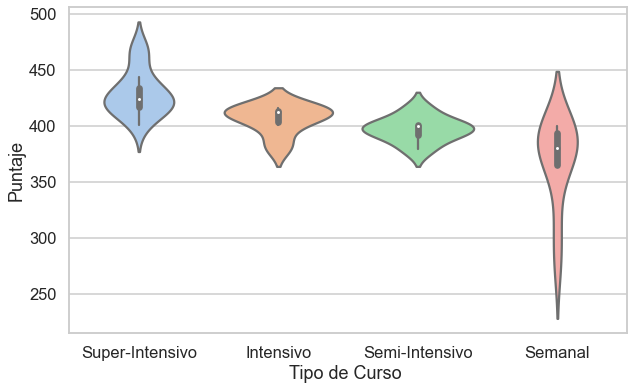

In [69]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Tipo de Curso ', y='Puntaje', data=df_cursos,order=['Super-Intensivo','Intensivo','Semi-Intensivo','Semanal'])

En la gráfica de violines podemos observar claramente la desviación estandar mayor que se tiene en el curso **Semanal** comparado con los otros cursos, con una tendencia a obtener puntajes bastante inferiores a los demás cursos.

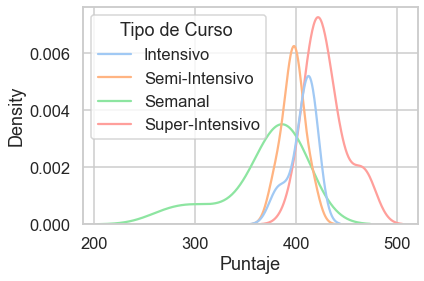

In [70]:
sns.kdeplot(data=df_cursos, x='Puntaje', hue='Tipo de Curso ',)

plt.show()

Por último, esta gráfica de densidad muestra el rango de resultados obtenidos por curso (eje x) cruzándolo con la cantidad o número resultados. En otras palabras es como coger la gráfica de violines, cortalo por la mitad en el eje Y y "acostarlo" en el eje x. 

Por la forma de las curvas de cada tipo de curso, se infiere que la distribución de los puntajes obtenidos en los cursos **Intensivo, Semi-Intensivo y Super-Intensivo** tienen desviaciones estandar pequeñas respecto a la media de cada tipo de curso, situación que no sucede con el curso **Semanal**.

b. (10%) Un estudiante que se encuentra indeciso por el curso a tomar considera que el
curso intensivo y el curso super intensivo no tienen ninguna diferencia. ¿Está de acuerdo
con esta afirmación?

Con el fin de validar que influencia el tipo de curso, entre **Intensivo** y **Super_Intensivo**, inicialmente se realiza una visualización de los puntajes asociados a dichos cursos para identificar posibles diferencias que soporten o rechacen la observación del estudiantes.

Se realiza inicialmente un histograma y un gráfico de caja de los puntajes para cada tipo curso:

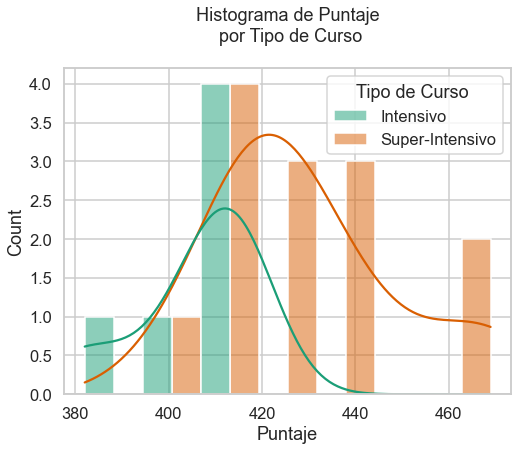

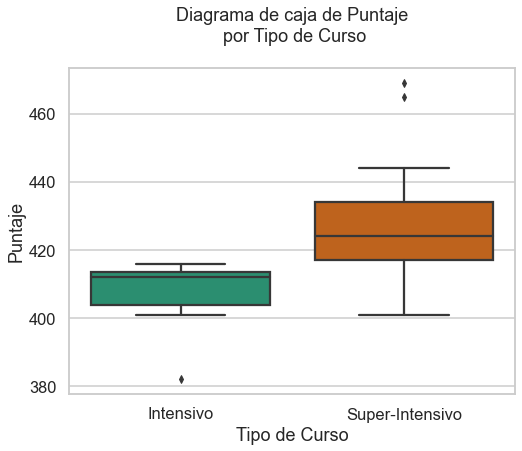

In [71]:
# Implementa tu respuesta en esta celda

plt.figure(figsize=(8,6))
sns.histplot(data=df_cursos[(df_cursos['Tipo de Curso ']=='Intensivo') | (df_cursos['Tipo de Curso ']=='Super-Intensivo')],
                                    x='Puntaje', hue='Tipo de Curso ', multiple='dodge', kde=True, palette='Dark2',)
plt.title('Histograma de Puntaje\n por Tipo de Curso\n')
plt.show()

#crear un boxplot para cada genero de la base de datos df
plt.figure(figsize=(8,6))
sns.boxplot(y='Puntaje', x='Tipo de Curso ',
            data=df_cursos[(df_cursos['Tipo de Curso ']=='Intensivo') | (df_cursos['Tipo de Curso ']=='Super-Intensivo')],
            palette='Dark2')
plt.title('Diagrama de caja de Puntaje\n por Tipo de Curso\n')
plt.xlabel('Tipo de Curso')
plt.ylabel('Puntaje')
plt.show()

A partir de las figuras anteriores, es posible observar una diferencia relativamente significativa para concluir que el tipo de curso, **Intensivo** o **Super-Intensivo** si influye sobre los putnajes obtenidos. Sin embargo, a continuación se realiza una prueba de hipótesis para validar estadísticamente esta observación.

**Prueba de Hipótesis:**

Nuestra hipótesis de investigación es que el puntaje promedio de los estudiantes de ambos cursos es diferente (bilateral), por tanto:

   $$H_0: \mu_{intensivo}=\mu_{super-intensivo} \text{ o } \mu_{intensivo}-\mu_{super-intensivo}=0$$
    
   $$H_1: \mu_{intensivo}\neq\mu_{super-intensivo} \text{ o } \mu_{intensivo}-\mu_{super-intensivo}\neq0$$
   
 A continuación se estima el estadistico T y el valor-p resultado a esta prueba:

In [72]:
from scipy.stats import ttest_ind

# Separar los datos por tipo de curso
grupo_intensivo = df_cursos[df_cursos['Tipo de Curso '] == 'Intensivo']['Puntaje']
grupo_super_int = df_cursos[df_cursos['Tipo de Curso '] == 'Super-Intensivo']['Puntaje']

# Realizar la prueba t para dos muestras independientes
t_stat, p_value = ttest_ind(grupo_intensivo, grupo_super_int, equal_var=False)  # 'equal_var=False' realiza la prueba t de Welch

print("T-Statistic:", t_stat)
print("P-Value:", p_value)
print("Promedio de puntaje para Curso Intensivo:", grupo_intensivo.mean())
print("Promedio de puntaje para Curso Super-Intensivo:", grupo_super_int.mean())

T-Statistic: -3.0288227921406046
P-Value: 0.008661720210800503
Promedio de puntaje para Curso Intensivo: 406.1666666666667
Promedio de puntaje para Curso Super-Intensivo: 429.3076923076923


- En este caso, existe evidencia estadística suficiente para rechazar la hipótesis nula $H_0$ en el nivel de significancia de $5\%$. Por tanto, los puntajes asociados a los dos tipos de cursos No tienen la misma media, y se puede inferir que tomar un curso u otro influye en el puntaje obtenido, contrario a la consideración del estudiante.

c. (10%) Uno de los profesores de la academia desea conocer los puntajes promedio de los estudiantes con el fin de establecer estrategias para que algún estudiante tenga un puntaje mayor a 483 que es el mejor de la academia, ¿cree usted que el profesor puede ayudar a sus estudiantes sugiriéndoles que tomen el curso semanal? ¿Qué curso cree usted que debe sugerir el profesor a sus estudiantes teniendo en cuenta los resultados que se han obtenido? <br>

In [73]:
# Implementa tu respuesta en esta celda

from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['Semanal', 'Semi-Intensivo','Intensivo', 'Super-Intensivo'], ordered=True)
df_cursos["Tipo de Curso "] = df_cursos["Tipo de Curso "].astype(cat_type)

In [74]:
# Implementa tu respuesta en esta celda
df_cursos.groupby("Tipo de Curso ").mean().sort_values(by="Tipo de Curso ")

,Puntaje
Tipo de Curso,
Semanal,368.545455
Semi-Intensivo,397.142857
Intensivo,406.166667
Super-Intensivo,429.307692


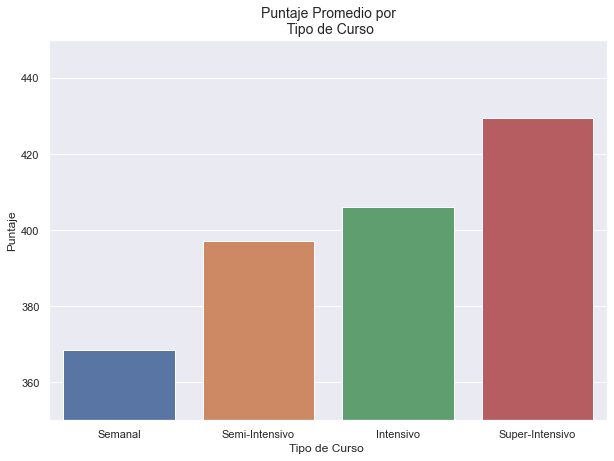

In [75]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 7))

sns.barplot(data= df_cursos.groupby("Tipo de Curso ").mean().reset_index(),
            y='Puntaje', x='Tipo de Curso ')
plt.title('Puntaje Promedio por\n Tipo de Curso', size = 14)
plt.ylim(350,450)
plt.show()

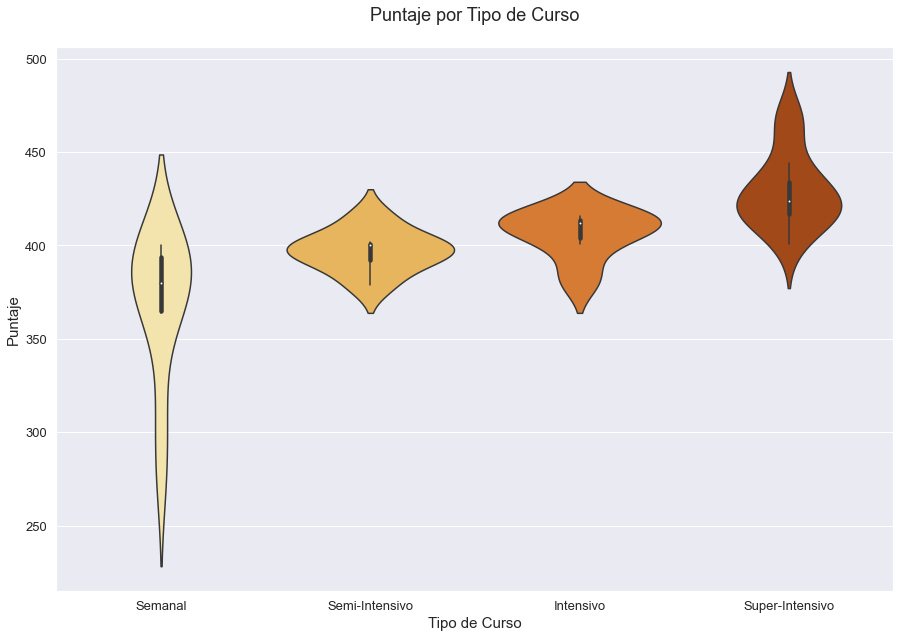

In [76]:
plt.figure(figsize=(15, 10))

sns.violinplot(x = df_cursos['Tipo de Curso '],
               y = df_cursos['Puntaje'],
               flierprops={"marker": "x"}, palette="YlOrBr"  )

plt.ylabel('Puntaje', size=15)
plt.xlabel('Tipo de Curso', size=15)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title('Puntaje por Tipo de Curso\n', size = 18)

plt.show()

De acuerdo con los resultados promedio obtenidos en el curso **Semanal** los cuales son inferiores a los demás tipos de cursos, no seria viable que el profesor recomendara a los estudiantes realizar este curso. Se infiere que la intensidad de este curso (5 horas /día) a la semana implicaria menos frecuencia de estudio y por ende menores resultados en las pruebas.

Es recomendable que la academia revise con detenimiento el curso **Semanal** dado que los resultados son bajos, puede que los estudiantes opten por no tomar este curso. 

Por otro lado, es recomendable que el profesor recomiende a los estudiantes realizar el curso **Super-Intensivo** dado que los estudiantes que han realizado este curso presentaron mejores restulados en las pruebas.



## Ejercicio 3

(30%) Battlife se dedica a la producción de baterías, se sabe la vida útil promedio de sus baterías siguen una distribución normal con una media de 900 horas y una desviación estándar de 45 horas. Un grupo de ingenieros quieren verificar que esta afirmación sea veraz, por lo tanto, deciden tomar una muestra aleatoria de 30 baterías con las cuales obtienen que la vida útil promedio es de 800 horas, con una desviación estándar muestral de 50 horas.

a. (10%) ¿Cuál es la probabilidad de que la vida útil promedio real de las baterías sea
menor a 780 horas?

In [77]:
# Implementa tu respuesta en esta celda

import numpy as np
from scipy import stats

# Datos dados
mean_sample = 790
mean_hypothesized = 780
std_sample = 50
n = 30

# Calcula el valor t
t_statistic = (mean_sample - mean_hypothesized) / (std_sample/np.sqrt(n))

# Encuentra la probabilidad asociada (p-valor para una prueba unilateral a la izquierda)
p_value = stats.t.cdf(t_statistic, df=n-1)

print("Valor t:", t_statistic)
print("P-valor:", p_value)


Valor t: 1.0954451150103321
P-valor: 0.8588318813569651


El z-score calculado es aproximadamente 2.44, lo que indica que la media muestral (800 horas) está a 2.44 desviaciones estándar por encima de la media hipotética (780 horas).
La probabilidad de que la vida útil promedio real sea menor a 780 horas es aproximadamente 
P
(
Z
<
−
2.44
)
P(Z<−2.44). Al obtener este valor desde una tabla de z (o utilizando la función cdf en scipy), vemos que es alrededor de 0.0075 o 0.75%.

Por lo tanto, hay una probabilidad muy baja (solo 0.75%) de que la vida útil promedio real de las baterías sea menor a 780 horas. Es probable que la afirmación inicial de que la vida útil promedio es de 900 horas con una desviación estándar de 45 horas sea veraz, aunque hay factores adicionales a considerar antes de llegar a una conclusión definitiva.

b. (10%) Un comprador está interesado en adquirir un lote de baterías, sin embargo, solicitó que, en una muestra de 40 baterías, la variabilidad de las vidas útiles no debe exceder 5 horas. Calcule la probabilidad de que la varianza de las vidas útiles de una muestra de 40 baterías supere este valor.

Para calcular la probabilidad de que la varianza de las vidas útiles no supere el valor definido de 25 horas$^{2}$, empleamos la distribución $X^{2}$ de la siguiente manera:

In [78]:
# Implementa tu respuesta en esta celda

from scipy.stats import chi2

# Datos dados
n = 40
sample_variance = 25
population_variance = 45**2  # Aquí estamos asumiendo la varianza bajo H0.

# Calcula el valor chi-cuadrado
chi2_statistic = (n-1) * sample_variance / population_variance

# Encuentra el p-valor para una prueba unilateral a la derecha
p_value = 1 - chi2.cdf(chi2_statistic, df = n-1)

print("Valor chi-cuadrado:", chi2_statistic)
print("P-valor:", p_value)

print(f"La probabilidad de que la varianza de las vidas útiles de una muestra de 40 baterías supere 25 horas es de {p_value:.0%}")


Valor chi-cuadrado: 0.48148148148148145
P-valor: 1.0
La probabilidad de que la varianza de las vidas útiles de una muestra de 40 baterías supere 25 horas es de 100%


La probabilidad de que la varianza de las vidas útil de una muestra de 40 baterías se mayor a 25 horas$^{2}$ es del 100%, por tanto, se puede concluir que la varianza de una muestra de 40 baterías siempre será mayor que 25 horas$^{2}$. Por lo que no es posible satisfacer la solicitud del comprador.  

c. (10%) El área de desarrollo esta haciendo un estudio de mercado dado que desean que las baterías producidas sean las que tengan la mejor vida útil del mercado. Por lo cual, se han obtenido los resultados de una empresa competidora “BattteriesInc”. De “BattteriesInc”. se conoce que la vida útil promedio de las baterías es de 885 horas con una desviación estándar de 30 horas. Se tomó una muestra aleatoria de 20 baterías de Battlife y 15 baterías de BattteriesInc. Asumiendo que las variables aleatorias son independientes, ¿cuál es la probabilidad de que la varianza muestral de la vida útil producida por Battlife menor a la varianza muestral del espesor de la vida útil de BatteriesInc?

In [79]:
# Implementa tu respuesta en esta celda

Con la información suminstrada en el problema no es posible demostrar la hipótesis planteada, pues a pesar de conocer las desviaciones estándar poblacionales, para calcular el estadístico F necesitamos conocer las varianzas muestrales y así calcular la probabilidad de que la varianza muestral de la vida últil producida por Battlife sea menor a la varianza muestral del espesor de la vida útil de BatteriesInc.

## Créditos

__Autores__: Laura Valentina Diaz Pinzon

__Actualizado por__: Alejandra Tabares Pozos.

__Fecha última actualización__: 01/09/2023